# [개념 필사] 핸즈온 머신러닝


# **CHAPTER4 <모델 훈련>**

## 4.1 선형회귀

* 일반적인 선형 모델
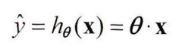

* 모델 훈련: 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

  -- RMSE 최소화 = MSE 최소화 (더 간단)
  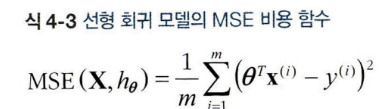

## 4.1.1 정규방정식

* 정규방정식: MSE 최소화하는 델타를 찾는 해석적인 방법
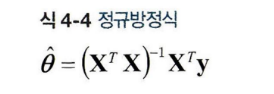
* LinearRegression 클래스 - scipy.linalg.lstsq() 함수 기반
* 특잇값 분해 (SVD): 표준 행렬 분해 기법. 유사역행렬 계산에 사용. 정규방정식과 달리 유사역행렬은 항상 구할 수 있음.

## 4.1.2 계산 복잡도

* 특성 수가 n배로 늘어날 때, n* *2.4 < 계산 복잡도 < n**3 (속도 저하)
* 샘플수, 특성수에 선형적 >> 적을 때 유용하겠지

## 4.2 경사 하강법

* 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정.
* 파라미터 벡터의 현재 경사 계산 -> 0까지 감소시키는 방법
* 무작위 초기화: 파라미터 벡터는 임의의 값으로 시작
* 학습률 하이퍼 파라미터: 경사하강하는 스텝의 크기

> 학습률이 너무 작을 때 vs. 학습률이 너무 클 때
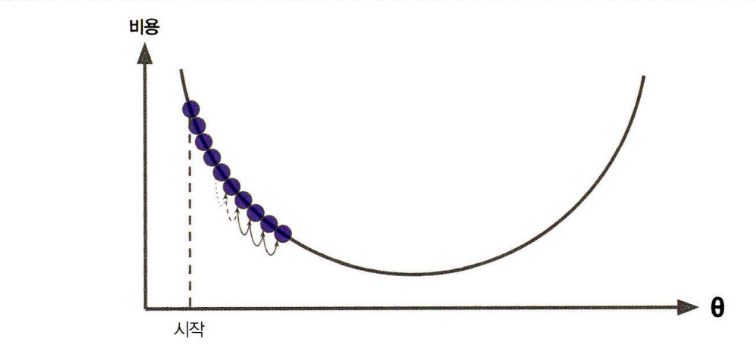

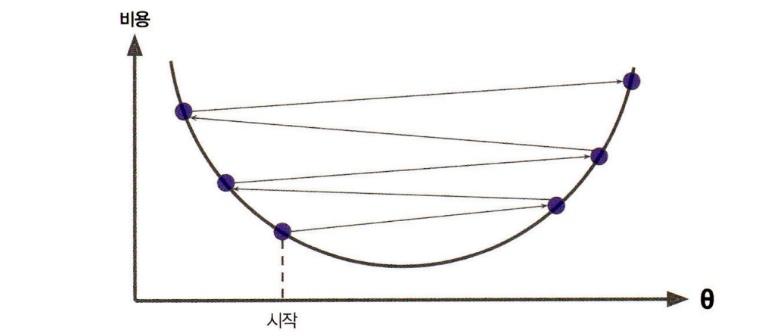


* 문제점1) 무작위초기화로 인해 알고리즘이 왼쪽에서 시작하면, 전역최솟값보다 지역최솟값으로 수렴하게됨.

* 문제점2) 알고리즘이 오른쪽에서 시작하면, 평지에서 정지하게됨.

* 선형회귀를 위한 MSE 비용 함수 = 볼록 함수 (문제점 발생 X)
* 모든 피처의 스케일링 필수

## 4.2.1 배치 경사 하강법

* 편도함수: 각 모델 파라미터에 대한 비용함수의 그래이디언트를 계산하는 함수.

* 적절한 학습률 <- 그리드 탐색

  -- 반복횟수 지정 중요! 아주 크게 지정한 다음, 경사 벡터가 허용오차보다 작아지면 알고리즘 중지하기.

* 매 스텝에서 전체 훈련 세트로 학습 (시간 증가)

## 4.2.2 확률적 경사 하강법 (SGD)

* 매 스텝에서 샘플 1개 무작위 선택, 그레이디언트 계산 (시간 빠름)

* 비용함수 최소화까지 요동치면서 (확률적으로) 평균적으로 감소 (매우 불안정한 방법)

* 점진적으로 감소시켜야함. 시작 시 학습률 크게 & 점차 감소시키기 => 전역 최솟값 도달

## 4.2.3 미니배치 경사 하강법

* 임의의 작은 샘플 세트(미니배치)에 대해 그레이디언트 계산
* 행렬 연산에 최적화, GPU사용으로 성능 향상 가능


> 배치 vs. 확률적 vs. 미니배치
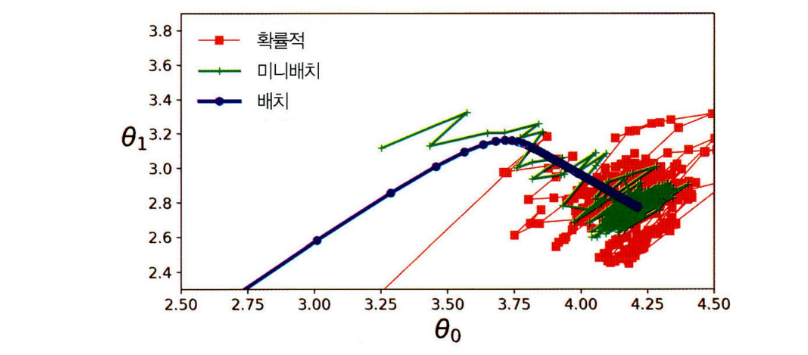

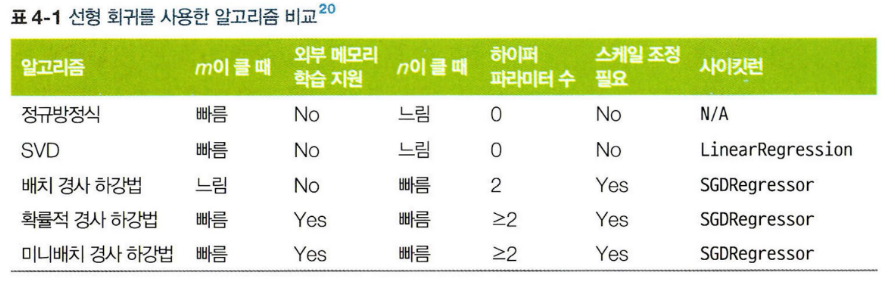

## 4.3 다항 회귀

* 비선형 데이터에서, 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이를 포함한 데이터셋에 선형모델을 훈련시키는 기법.

* 특성이 여러 개, 특성 사이의 관계 파악 가능

## 4.4 학습 곡선

* 과대적합, 과소적합 파악해야함.

* 학습 곡선: 훈련세트와 검증세트의 모델 성능을 훈련세트 크기의 함수로 나타냄. 훈련세트에서 크기가 다른 서브 세트를 만들어 모델 여러 번 훈련시켜서 생성.

# [코드 필사]

In [4]:
# 무작위 선형 데이터셋

import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X+np.random.randn(100,1)

In [5]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg - 선형대수모듈, inv - 역행렬 계산, dot - 행렬곱

In [6]:
>>> theta_best

array([[3.70434264],
       [3.28759528]])

절편 = 3.9195, 가중치 = 2.9744 (기대하지 않은 숫자, 잡음 때문)



In [7]:
>>> X_new = np.array([[0],[2]])
>>> X_new_b = np.c_[np.ones((2,1)),X_new] # 모든 샘플에 x0 = 1 추가
>>> y_predict = X_new_b.dot(theta_best)
>>> y_predict

array([[ 3.70434264],
       [10.2795332 ]])

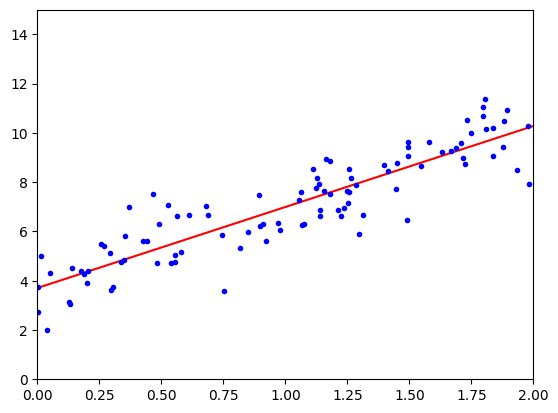

In [8]:
import matplotlib.pyplot as plt

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [11]:
# 사이킷런에서 선형회귀 수행
>>> from sklearn.linear_model import LinearRegression
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X,y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([3.70434264]), array([[3.28759528]]))

In [12]:
>>> lin_reg.predict(X_new)

array([[ 3.70434264],
       [10.2795332 ]])

In [13]:
>>> theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
>>> theta_best_svd

array([[3.70434264],
       [3.28759528]])

In [14]:
>>> np.linalg.pinv(X_b).dot(y) # np.linalg.pinv() - 유사역행렬 계산(무어-펜로즈 역행렬)

array([[3.70434264],
       [3.28759528]])

In [15]:
## 배치경사하강법 간단하게 구현

eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [16]:
>>> theta

array([[3.70434264],
       [3.28759528]])

In [17]:
## 확률적 경사 하강법 구현

n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 무작위초기화

for epoch in range(n_epochs): # 일반적으로 한 반복에서 m번 반복, 각 반복 "에포크"
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [18]:
>>> theta

array([[3.64600454],
       [3.3942926 ]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
# 최대 1000번 에포크동안 실행
# 한 에포크에서 0.001보다 적게 손실이 줄어들때까지 실행
# 학습률 0.1
# 규제 X
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
>>> sgd_reg.intercept_, sgd_reg.coef_

(array([3.73453041]), array([3.31144328]))

In [21]:
## 다항회귀, 2차방정식 비선형 데이터 생성

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [22]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> poly_features = PolynomialFeatures(degree=2, include_bias=False) # 각 특성의 제곱을 새 특성으로 추가
>>> X_poly = poly_features.fit_transform(X)
>>> X[0]

array([-0.14358365])

In [23]:
>>> X_poly[0]

array([-0.14358365,  0.02061626])

In [26]:
## 선형회귀 적용
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X_poly,y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([1.96071186]), array([[1.02971622, 0.54141893]]))

In [25]:
## 학습곡선 그리는 함수 정의

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="훈련 세트")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="검증 세트")

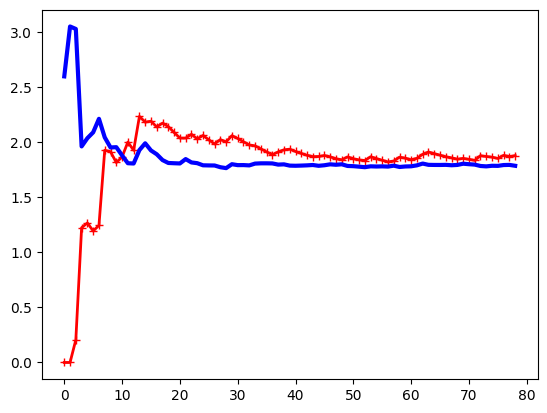

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

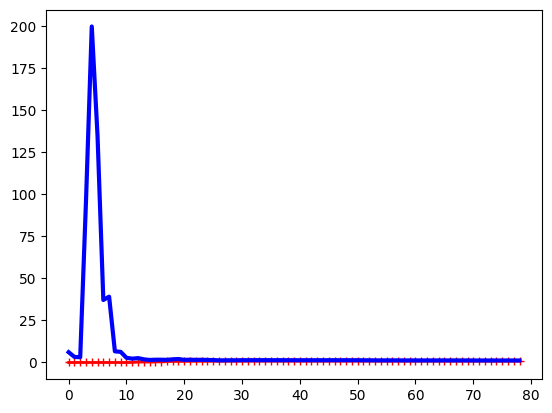

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)